In [2]:
import numpy as np
import time
import math
# zdefiniowanie funkcji przystosowania
def sphere(x,y):
    return x*x+y*y-20*(math.cos(math.pi*x)+math.cos(math.pi*y)-2)

avg_x = np.array([])
avg_y = np.array([])
avg_z = np.array([])

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_fitness = []

# zdefiniowanie algorytmu roju cząstek
def pso(cost_func, dim=2, num_particles=30, max_iter=50, w=0.5, c1=1, c2=2):
    
    # zainicjowanie cząstek i ich prędkości
    particles = np.random.uniform(-10, 10, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # inicjalizacja najlepszych pozycji cząstek oraz funkcji przystosowania (fitness function)
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p[0], p[1]) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # iterujemy sie przez podana w funkcji ilosc iteracji, aktualizujac prednosci i pozycji każdej z cząstek
    for i in range(max_iter):
        # aktualizacja wartości prędkości cząstek
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # aktualizacja pozycji cząstek
        particles += velocities

        # ewaluacja funkcji przystosowania dla każdej z cząstek
        fitness_values = np.array([cost_func(p[0], p[1]) for p in particles])
        
        # zapisujemy średnią wartość funkcji przystosowania w roju
        avgs.append(np.mean(fitness_values))
        # aktualizacja najlepszych pozycji i funkcji przystosowania
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)
            
        # zapisujemy najlepszą wartość funkcji przystosowania
        bests_fitness.append(swarm_best_fitness)
        # if i==max_iter-1:
        #   print('Epoch:',i)
        #   print('Swarm best position:',swarm_best_position)
        #   print('Swarm best fitness:', swarm_best_fitness)
    # zwrócenie najlepszego wyniku znalezionego przez algorytm
    return swarm_best_position, swarm_best_fitness

c1=0, c2=2

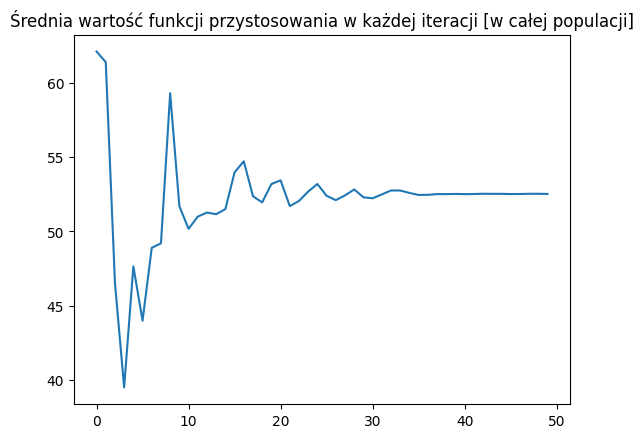

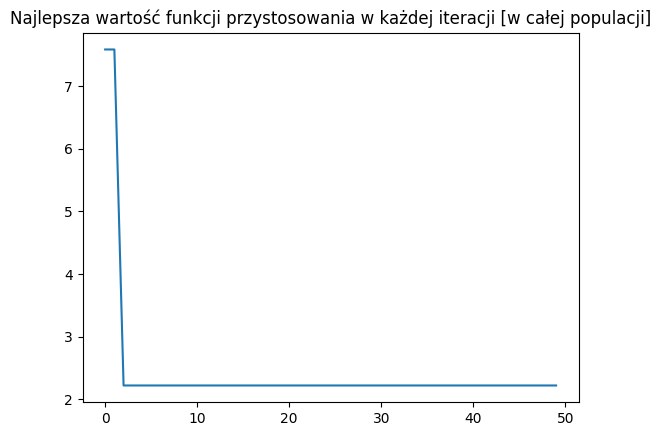

---
Rozwiązanie: [0.73293304 1.56108882]
Wartość funkcji przystosowania: 2.2184078505855207
---
Rozwiązanie: [-3.97319435  4.80426815]
Wartość funkcji przystosowania: 9.69745055903197
---
Rozwiązanie: [1.8456817  0.33885262]
Wartość funkcji przystosowania: 3.9780126096203228
---
Rozwiązanie: [-0.02450183  2.71312159]
Wartość funkcji przystosowania: 4.139386187359952
---
Rozwiązanie: [-0.93403256 -0.86628564]
Wartość funkcji przystosowania: 3.600232052974157
---
Rozwiązanie: [4.48133367 9.60263072]
Wartość funkcji przystosowania: 11.21826339763446
---
Rozwiązanie: [-0.28070857 -0.80398025]
Wartość funkcji przystosowania: 0.6772944863251255
---
Rozwiązanie: [-2.26818302 -3.63206324]
Wartość funkcji przystosowania: 8.698892105883221
---
Rozwiązanie: [0.09303609 2.21330943]
Wartość funkcji przystosowania: 4.096491309700924
---
Rozwiązanie: [-1.21337259 -2.18444489]
Wartość funkcji przystosowania: 0.1602407058023792
time:  0.053508639335632324
avg:  -0.15410084405125835 1.3746497329226597 4

In [ ]:
import matplotlib.pyplot as plt

t = time.time()
avg_x = np.array([])
avg_y = np.array([])
avg_z = np.array([])
avgs = []
bests_fitness = []
for i in range(10):
  solution, fitness = pso(sphere, c1=0, c2=2)
  avg_x = np.append(avg_x, [solution[0]])
  avg_y = np.append(avg_y, [solution[1]])
  avg_z = np.append(avg_z, fitness)
  if i==0:
    plt.plot(avgs)
    plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
    print('    ')
    plt.plot(bests_fitness)
    plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
  print('---')
  # wydrukowanie wyników
  print('Rozwiązanie:', solution)
  print('Wartość funkcji przystosowania:', fitness)
print('time: ', (time.time()-t)/10)
print('avg: ', np.average(avg_x), np.average(avg_y), np.average(avg_z))
print('std: ', np.std(avg_x), np.std(avg_y), np.std(avg_z))

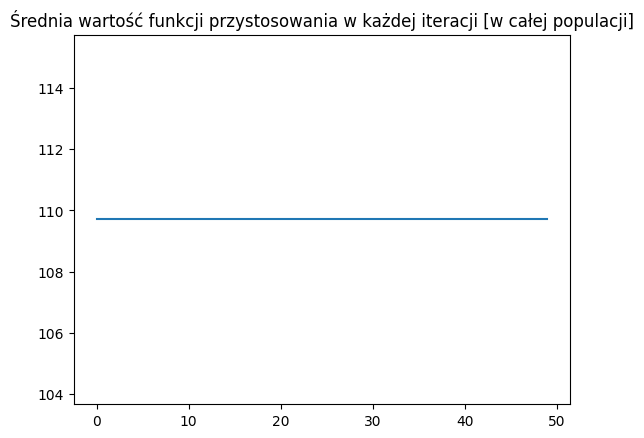

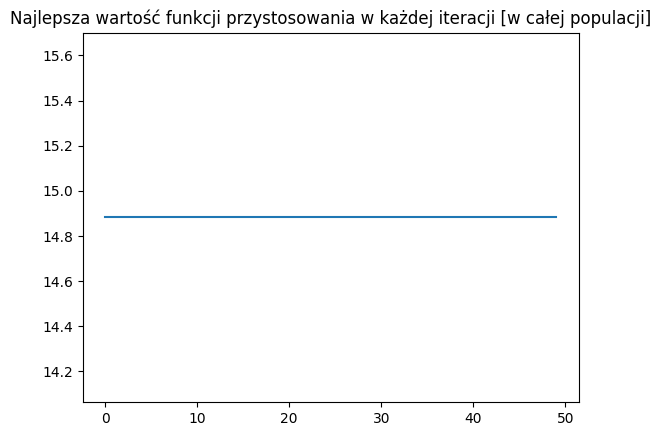

---
Rozwiązanie: [ 1.98436434 -0.34783412]
Wartość funkcji przystosowania: 14.881961770083059
---
Rozwiązanie: [3.60834288 0.14163507]
Wartość funkcji przystosowania: 28.310936073025523
---
Rozwiązanie: [-1.57892389 -0.3061755 ]
Wartość funkcji przystosowania: 26.238865415120557
---
Rozwiązanie: [ 1.74458223 -0.57796856]
Wartość funkcji przystosowania: 34.328289458195705
---
Rozwiązanie: [-0.31998353 -2.43672769]
Wartość funkcji przystosowania: 31.37323333164226
---
Rozwiązanie: [ 1.19429321 -2.01055307]
Wartość funkcji przystosowania: 41.86813980544915
---
Rozwiązanie: [-0.29728139 -0.25280069]
Wartość funkcji przystosowania: 14.241658926934551
---
Rozwiązanie: [ 1.65028068 -0.0085268 ]
Wartość funkcji przystosowania: 13.635154613682364
---
Rozwiązanie: [-0.111666    2.20606125]
Wartość funkcji przystosowania: 10.143707742011152
---
Rozwiązanie: [-0.1710322  -1.72634374]
Wartość funkcji przystosowania: 12.7747327133745
avg:  0.7702976323728352 -0.5319233855341212 22.77966798495188
std

In [ ]:
t = time.time()
avg_x = np.array([])
avg_y = np.array([])
avg_z = np.array([])
avgs = []
bests_fitness = []
for i in range(10):
  solution, fitness = pso(sphere, c1=2, c2=0)
  avg_x = np.append(avg_x, [solution[0]])
  avg_y = np.append(avg_y, [solution[1]])
  avg_z = np.append(avg_z, fitness)
  if i==0:
    plt.plot(avgs)
    plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
    print('    ')
    plt.plot(bests_fitness)
    plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
  print('---')
  # wydrukowanie wyników
  print('Rozwiązanie:', solution)
  print('Wartość funkcji przystosowania:', fitness)
print('avg: ', np.average(avg_x), np.average(avg_y), np.average(avg_z))
print('std: ', np.std(avg_x), np.std(avg_y), np.std(avg_z))

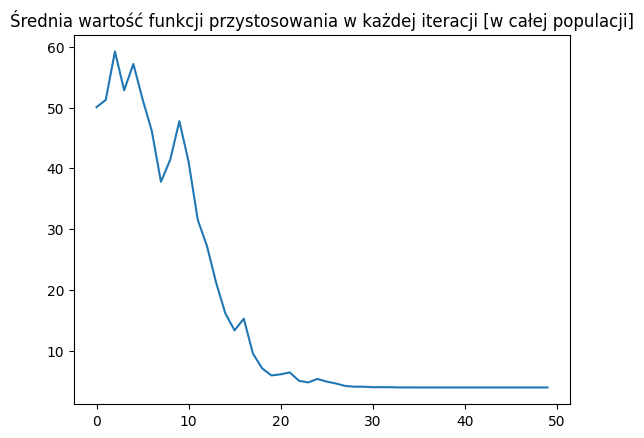

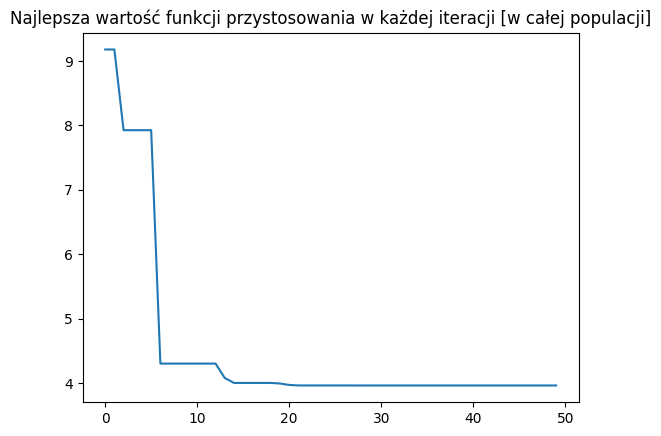

---
Rozwiązanie: [ 1.97995129e+00 -7.16150908e-06]
Wartość funkcji przystosowania: 3.9598648844204676
---
Rozwiązanie: [1.98043282e+00 1.43245706e-04]
Wartość funkcji przystosowania: 3.95986520713167
---
Rozwiązanie: [-9.76885324e-06  5.22808368e-05]
Wartość funkcji przystosowania: 2.277126578528947e-10
---
Rozwiązanie: [-1.07452009e-04 -8.49981485e-05]
Wartość funkcji przystosowania: 1.337038175996462e-07
---
Rozwiązanie: [-3.88967704e-06 -1.70126029e-04]
Wartość funkcji przystosowania: 5.963839809931282e-07
---
Rozwiązanie: [ 4.13936247e-06 -1.15645280e-06]
Wartość funkcji przystosowania: 1.8415556108431461e-09
---
Rozwiązanie: [-1.97993495e+00 -3.68489166e-05]
Wartość funkcji przystosowania: 3.959864884585523
---
Rozwiązanie: [ 0.00019543 -0.00013778]
Wartość funkcji przystosowania: 5.968166628359267e-07
---
Rozwiązanie: [ 4.35442624e-07 -3.68751363e-06]
Wartość funkcji przystosowania: 1.3745477602711936e-09
---
Rozwiązanie: [-0.00018304  0.00108374]
Wartość funkcji przystosowania: 

In [ ]:
t = time.time()
avg_x = np.array([])
avg_y = np.array([])
avg_z = np.array([])
avgs = []
bests_fitness = []
for i in range(10):
  solution, fitness = pso(sphere, c1=0.5, c2=1.5)
  avg_x = np.append(avg_x, [solution[0]])
  avg_y = np.append(avg_y, [solution[1]])
  avg_z = np.append(avg_z, fitness)
  if i==0:
    plt.plot(avgs)
    plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
    print('    ')
    plt.plot(bests_fitness)
    plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
  print('---')
  # wydrukowanie wyników
  print('Rozwiązanie:', solution)
  print('Wartość funkcji przystosowania:', fitness)
print('avg: ', np.average(avg_x), np.average(avg_y), np.average(avg_z))
print('std: ', np.std(avg_x), np.std(avg_y), np.std(avg_z))

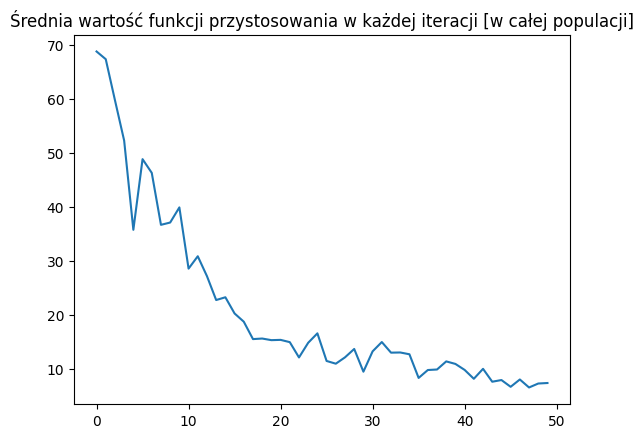

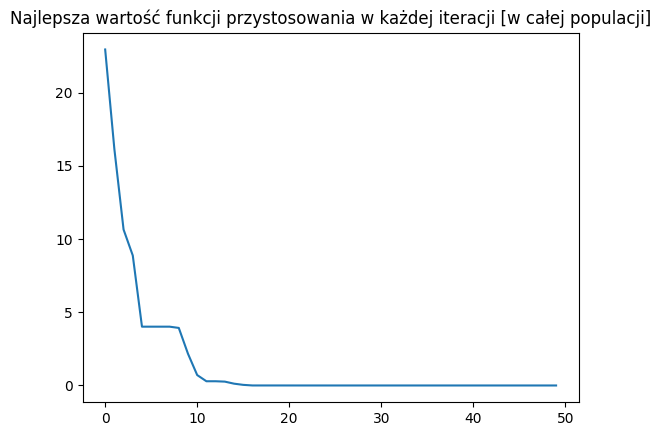

---
Rozwiązanie: [ 2.59196461e-06 -1.98994749e-06]
Wartość funkcji przystosowania: 1.0645729207593948e-09
---
Rozwiązanie: [-1.37076325e-04  6.85332145e-05]
Wartość funkcji przystosowania: 2.3415330886823186e-06
---
Rozwiązanie: [-2.28381530e-05  6.50168294e-06]
Wartość funkcji przystosowania: 5.621392433323233e-08
---
Rozwiązanie: [5.96966183e-07 1.52782897e-06]
Wartość funkcji przystosowania: 4.5078671356298895e-11
---
Rozwiązanie: [-1.81467328e-06 -3.78294067e-06]
Wartość funkcji przystosowania: 2.341812643690937e-10
---
Rozwiązanie: [7.53087749e-07 9.22775053e-06]
Wartość funkcji przystosowania: 8.545795604363322e-09
---
Rozwiązanie: [ 2.48379936e-06 -5.88360611e-06]
Wartość funkcji przystosowania: 2.5433099578997647e-09
---
Rozwiązanie: [1.35906623e-06 7.17660852e-07]
Wartość funkcji przystosowania: 2.2536200906598877e-10
---
Rozwiązanie: [ 0.00020907 -0.00240327]
Wartość funkcji przystosowania: 5.2350395029040664e-06
---
Rozwiązanie: [4.69981809e-07 3.70805400e-06]
Wartość funkcj

In [ ]:
t = time.time()
avg_x = np.array([])
avg_y = np.array([])
avg_z = np.array([])
avgs = []
bests_fitness = []
for i in range(10):
  solution, fitness = pso(sphere, c1=1, c2=1)
  avg_x = np.append(avg_x, [solution[0]])
  avg_y = np.append(avg_y, [solution[1]])
  avg_z = np.append(avg_z, fitness)
  if i==0:
    plt.plot(avgs)
    plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
    print('    ')
    plt.plot(bests_fitness)
    plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
  print('---')
  # wydrukowanie wyników
  print('Rozwiązanie:', solution)
  print('Wartość funkcji przystosowania:', fitness)
print('avg: ', np.average(avg_x), np.average(avg_y), np.average(avg_z))
print('std: ', np.std(avg_x), np.std(avg_y), np.std(avg_z))

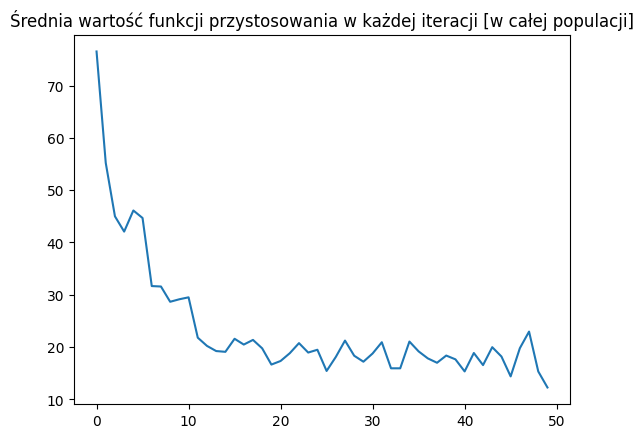

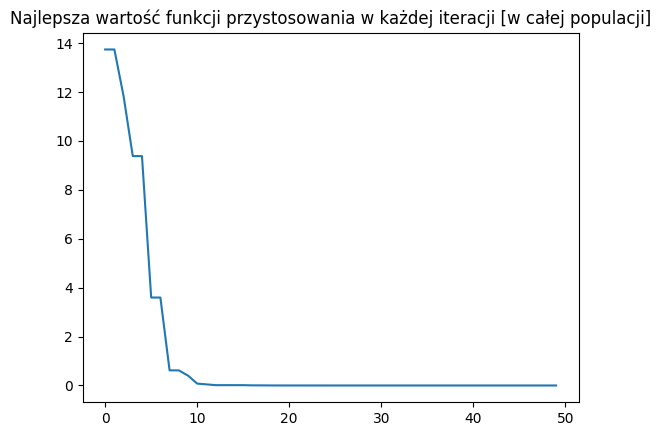

---
Rozwiązanie: [ 2.94304124e-08 -9.65881452e-08]
Wartość funkcji przystosowania: 1.0138370332223194e-12
---
Rozwiązanie: [1.20925416e-06 3.69415043e-06]
Wartość funkcji przystosowania: 1.447883089338697e-09
---
Rozwiązanie: [3.88406853e-07 2.41432485e-07]
Wartość funkcji przystosowania: 2.5117527352886023e-13
---
Rozwiązanie: [0.00613399 0.00174233]
Wartość funkcji przystosowania: 0.004053679491964377
---
Rozwiązanie: [9.49112686e-08 5.91407823e-07]
Wartość funkcji przystosowania: 3.577044495515359e-11
---
Rozwiązanie: [-2.46109206e-07 -8.14164692e-07]
Wartość funkcji przystosowania: 6.673207206409906e-11
---
Rozwiązanie: [ 1.23936319e-06 -1.06671715e-05]
Wartość funkcji przystosowania: 6.98772115487388e-09
---
Rozwiązanie: [1.31190105e-06 7.66693198e-07]
Wartość funkcji przystosowania: 4.120739953746353e-11
---
Rozwiązanie: [3.95392318e-08 1.77215300e-07]
Wartość funkcji przystosowania: 1.794112387662763e-13
---
Rozwiązanie: [0.00561129 0.04597187]
Wartość funkcji przystosowania: 0.

In [ ]:
t = time.time()
avg_x = np.array([])
avg_y = np.array([])
avg_z = np.array([])
avgs = []
bests_fitness = []
for i in range(10):
  solution, fitness = pso(sphere, c1=1.5, c2=0.5)
  avg_x = np.append(avg_x, [solution[0]])
  avg_y = np.append(avg_y, [solution[1]])
  avg_z = np.append(avg_z, fitness)
  if i==0:
    plt.plot(avgs)
    plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
    print('    ')
    plt.plot(bests_fitness)
    plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
  print('---')
  # wydrukowanie wyników
  print('Rozwiązanie:', solution)
  print('Wartość funkcji przystosowania:', fitness)
print('avg: ', np.average(avg_x), np.average(avg_y), np.average(avg_z))
print('std: ', np.std(avg_x), np.std(avg_y), np.std(avg_z))

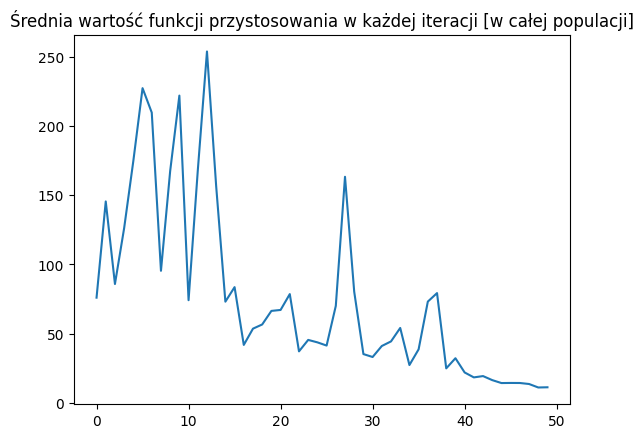

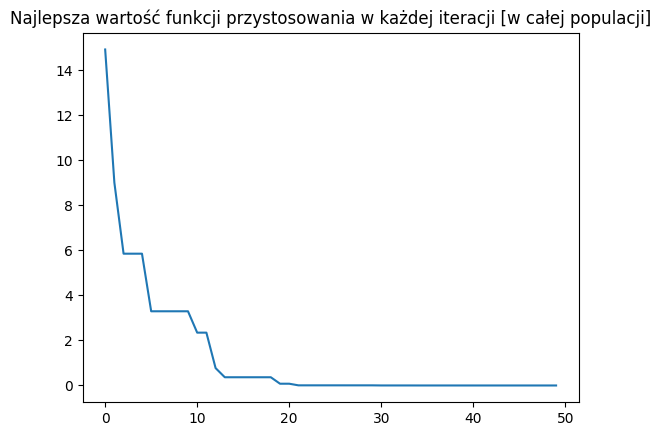

---
Rozwiązanie: [ 0.00037991 -0.00010692]
Wartość funkcji przystosowania: 1.5529152019886323e-05
---
Rozwiązanie: [ 7.88112645e-05 -8.09183850e-05]
Wartość funkcji przystosowania: 1.2720218633202105e-06
---
Rozwiązanie: [-0.00031598  0.0002432 ]
Wartość funkcji przystosowania: 1.585066285090232e-05
---
Rozwiązanie: [-0.00010645  0.00071004]
Wartość funkcji przystosowania: 1.135357440659449e-05
---
Rozwiązanie: [-0.00040705 -0.00090615]
Wartość funkcji przystosowania: 3.492424971176064e-05
---
Rozwiązanie: [ 0.001479   -0.00427617]
Wartość funkcji przystosowania: 0.0003339250601321132
---
Rozwiązanie: [ 0.01501136 -0.00245905]
Wartość funkcji przystosowania: 0.0006092700752808055
---
Rozwiązanie: [-0.00110557 -0.00064236]
Wartość funkcji przystosowania: 5.2594700108015376e-05
---
Rozwiązanie: [ 3.00380890e-04 -7.63241853e-05]
Wartość funkcji przystosowania: 1.5518562778832064e-06
---
Rozwiązanie: [-0.00889316  0.01756685]
Wartość funkcji przystosowania: 0.006999726121335952
avg:  0.000

In [ ]:
avg_x = np.array([])
avg_y = np.array([])
avg_z = np.array([])
avgs = []
bests_fitness = []
for i in range(10):
  solution, fitness = pso(sphere, c1=2, c2=2)
  avg_x = np.append(avg_x, [solution[0]])
  avg_y = np.append(avg_y, [solution[1]])
  avg_z = np.append(avg_z, fitness)
  if i==0:
    plt.plot(avgs)
    plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
    print('    ')
    plt.plot(bests_fitness)
    plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
    plt.show()
  print('---')
  # wydrukowanie wyników
  print('Rozwiązanie:', solution)
  print('Wartość funkcji przystosowania:', fitness)
print('avg: ', np.average(avg_x), np.average(avg_y), np.average(avg_z))
print('std: ', np.std(avg_x), np.std(avg_y), np.std(avg_z))

In [4]:
import matplotlib.pyplot as plt

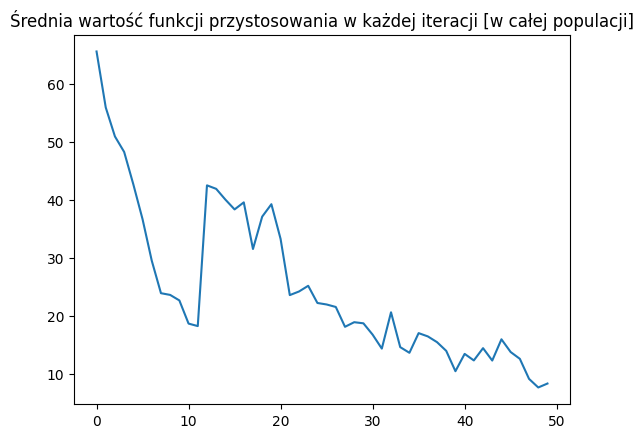

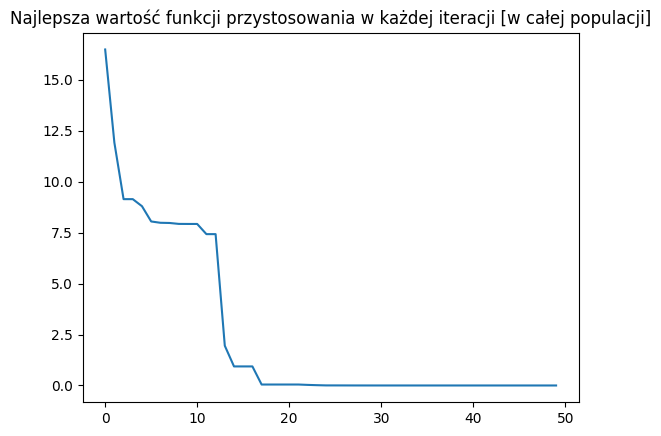

---
Rozwiązanie: [2.60404947e-07 1.76508117e-07]
Wartość funkcji przystosowania: 3.5348672653422975e-12
------------------------------
---
Rozwiązanie: [9.40063046e-11 3.31335868e-13]
Wartość funkcji przystosowania: 3.030529641728084e-21
------------------------------
---
Rozwiązanie: [-5.03476535e-10 -6.15982234e-10]
Wartość funkcji przystosowania: 6.329227345724441e-19
------------------------------
---
Rozwiązanie: [ 5.35399644e-08 -2.72736927e-08]
Wartość funkcji przystosowania: 9.866176274631143e-14
------------------------------
---
Rozwiązanie: [-2.17694574e-11  3.65472080e-10]
Wartość funkcji przystosowania: 1.3404375068036084e-19
------------------------------
---
Rozwiązanie: [1.97992585e+00 5.24441370e-10]
Wartość funkcji przystosowania: 3.9598648844064575
------------------------------
---
Rozwiązanie: [-1.45786341e-11 -1.25188921e-12]
Wartość funkcji przystosowania: 2.141038001943479e-22
------------------------------
---
Rozwiązanie: [-5.29466207e-09 -3.47016069e-09]
Wart

In [5]:

for w in [0.2]:
  avg_x = np.array([])
  avg_y = np.array([])
  avg_z = np.array([])
  
  avgs = []
  bests_fitness = []
  for i in range(10):
    solution, fitness = pso(sphere, w=w)
    avg_x = np.append(avg_x, [solution[0]])
    avg_y = np.append(avg_y, [solution[1]])
    avg_z = np.append(avg_z, fitness)
    if i==0:
      plt.plot(avgs)
      plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
      plt.show()
      print('    ')
      plt.plot(bests_fitness)
      plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
      plt.show()
    print('---')
    # wydrukowanie wyników
    print('Rozwiązanie:', solution)
    print('Wartość funkcji przystosowania:', fitness)
    print('-'*30)
  print('avg: ', np.average(avg_x), np.average(avg_y), np.average(avg_z))
  print('std: ', np.std(avg_x), np.std(avg_y), np.std(avg_z))

In [ ]:
import random 
class Zadanie2:
  def __init__(self, randomize_genes = False):
    self.x = random.uniform(-10.0, 10.0)
    self.y = random.uniform(-10.0, 10.0)

  # funkcja przystosowania:
  def get_adaptation(self):
    return self.x*self.x+self.y*self.y-20*(math.cos(math.pi*self.x)+math.cos(math.pi*self.y)-2)
  
  # krzyżowanie jednopunktowe z innym osobnikiem:
  def crossover(self, other_solution):
    new_solution = Zadanie2()
    new_solution.x = self.x
    new_solution.y = other_solution.y
    return new_solution

  # mutacja przez obrót bitu na losowej pozycji:
  def mutation(self):
    self.x = random.uniform(-10.0, 10.0)
    self.y = random.uniform(-10.0, 10.0)

Epoch:  0 ; avg adaptation:  101.76962472880463 ; best adaptation:  22.87670176930655  best adaptation ever:  22.87670176930655  from iteration  0
Epoch:  1 ; avg adaptation:  99.21063319024844 ; best adaptation:  25.69503647623088  best adaptation ever:  22.87670176930655  from iteration  0
Epoch:  2 ; avg adaptation:  109.62893656586994 ; best adaptation:  22.90655354757162  best adaptation ever:  22.87670176930655  from iteration  0
Epoch:  3 ; avg adaptation:  115.52916983548229 ; best adaptation:  28.028243421423014  best adaptation ever:  22.87670176930655  from iteration  0
Epoch:  4 ; avg adaptation:  107.43522385206124 ; best adaptation:  20.614359987439393  best adaptation ever:  20.614359987439393  from iteration  4
Epoch:  5 ; avg adaptation:  113.36209052152176 ; best adaptation:  5.659200484526094  best adaptation ever:  5.659200484526094  from iteration  5
Epoch:  6 ; avg adaptation:  122.24644431920966 ; best adaptation:  30.014608330803547  best adaptation ever:  5.659

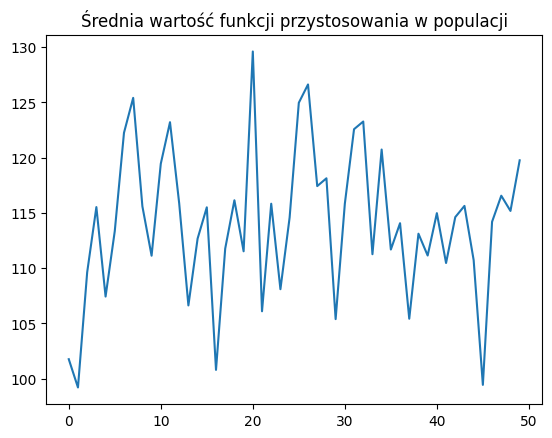

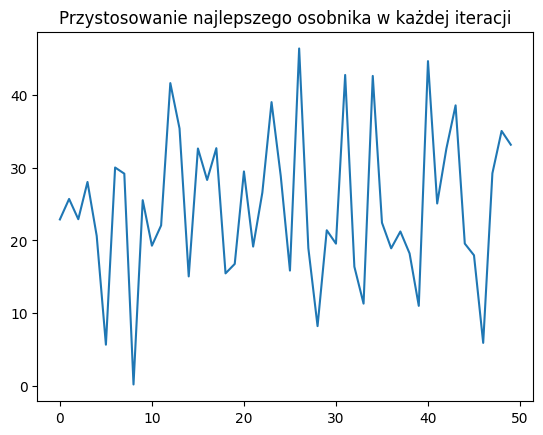

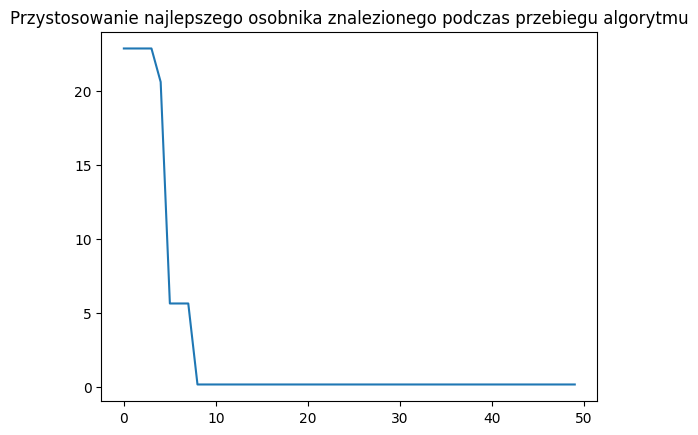

In [ ]:
# inicjalizujemy parametry:
t = time.time()
population_size = 50
iterations = 50
mutation_chance = 0.7

# generujemy populację:
population = [Zadanie2(randomize_genes = True) for i in range(population_size)]

# najlepszy osobnik znaleziony w ciągu całego algorytmu (na razie włóżmy tu zerowego):
best_solution = Zadanie2()
best_solution_adaptation = 1000.
best_iteration_found = 0

# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_local = []
bests_global = []

for iteration in range(iterations):
  # tworzymy koło ruletki - każdemu osobnikowi odpowiada jego funkcja przystosowania
  adaptations = [p.get_adaptation() for p in population]

  # zapiszmy najlepszego osobnika
  local_best_solution = population[adaptations.index(min(adaptations))]
  if local_best_solution.get_adaptation() < best_solution_adaptation:
    best_solution = local_best_solution
    best_solution_adaptation = local_best_solution.get_adaptation()
    best_iteration_found = iteration

  # sprawdźmy, jak radzi sobie populacja
  print("Epoch: ", iteration, "; avg adaptation: ", sum(adaptations) / len(adaptations), "; best adaptation: ", min(adaptations), " best adaptation ever: ", best_solution_adaptation, " from iteration ", best_iteration_found)

  # zapiszmy dane
  avgs.append(sum(adaptations) / len(adaptations))
  bests_local.append(min(adaptations))
  bests_global.append(best_solution_adaptation)

  # tworzymy koło ruletki na podstawie funkcji przystosowania
  roulette_wheel = adaptations
  # dokonujemy normalizacji wyników, żeby w późniejszym etapie działania algorytmu dalej pojawiały się różnice między osobnikami
  for i in range(len(roulette_wheel)):
    roulette_wheel[i] -= min(adaptations)
    # print(max(adaptations),min(adaptations), roulette_0wheel[i])
    roulette_wheel[i] /= (max(adaptations)-min(adaptations))

  # tworzymy z populacji dwie listę, ważoną kołem ruletki
  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(population_size)]

  # tworzymy dzieci z par rodziców
  children = [p[0].crossover(p[1]) for p in parents]

  # dokonujemy losowej mutacji wśród dzieci
  for c in children:
    if random.random() < mutation_chance:
      c.mutation()

  # zastępujemy poprzednią populację:
  population = children

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# sprawdźmy najlepszego osobnika po ostatnich zmianach populacji:
adaptations = [p.get_adaptation() for p in population]
local_best_solution = population[adaptations.index(min(adaptations))]
if local_best_solution.get_adaptation() < best_solution_adaptation:
  best_solution = local_best_solution
  best_solution_adaptation = local_best_solution.get_adaptation()

# wypiszmy najlepszego osobnika:

print('Execution_time: ', time.time()-t)

print('---')
print('Best solution: ', best_solution.x, ', ', best_solution.y)
print('Found in iteration: ', best_iteration_found)
print('Largest function value found: ', best_solution_adaptation)
plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w populacji")
plt.show()
print('    ')
plt.plot(bests_local)
plt.title("Przystosowanie najlepszego osobnika w każdej iteracji")
plt.show()
print('    ')
plt.plot(bests_global)
plt.title("Przystosowanie najlepszego osobnika znalezionego podczas przebiegu algorytmu")
plt.show()